# Test for the Best Features and Algorithms

Below are five algorithms, each will process one set of input. The output can be used to test and select features and algorithms to be used in the final model.

Using several algorithms, find the best hyperparameters for them, and save a model to be tested later. All models created on this page should be tested for the best overall model. 

## Logistic Regression
### Definition
Regression: Statistical process for estimating the relationships among variables, often to make a prediction about some outcome.

Linear: 
1. used for:
    1. continuous target variabls y=mx+b
 

Logistic:
1. Used for:
    1. binary target variable
    2. Well-behaved data
    3. Quick benchmarking
2. Not good for
    1. Continuous data
    2. Fat or Skinny data
    3. Massive data sets
    4. High performance


### Hyperparameters
##### C
1. Considered a regularization parameter
C=1/$\lambda$
If $\lambda$ = 0, then C = $\infity$
Therefore, Low Regularizaion = High Complexity, and More Likely to OVERFIT

The inverse leads to UNDERFIT

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# supress sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

%matplotlib inline

In [60]:
# For feature/algorithm modeling, select one of the following as feature_set:
# all, raw, trans, or 'reduced'.

feature_set = 'reduced'

tr_features = pd.read_csv('../output/train_features_{}.csv'.format(feature_set))
tr_labels = pd.read_csv('../output/train_labels.csv')



tr_features.head()

,line_length,word_count,verb_percentage_trans,adj_percentage
0,9,1,0.000000,0.0
1,71,15,1.837091,0.0
2,5,2,0.000000,0.0
3,36,4,0.000000,50.0
4,15,1,0.000000,100.0


## Correlated Features
Check for high (postive or negative) correlation between features. This could cause noise for the model, and confuse it.

Reducing this noise can be done

<AxesSubplot:>

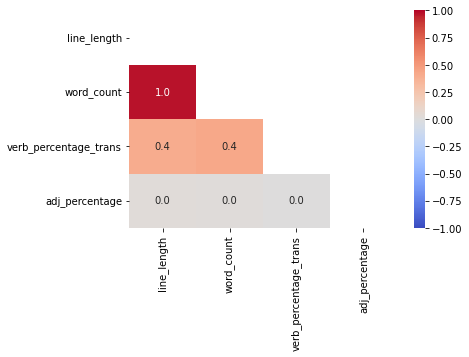

In [61]:
# Generate correlation matrix heat map
matrix = np.triu(tr_features.corr())
sns.heatmap(tr_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [62]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}.'.format(round(mean, 3), round(std*2, 3), params))
        

In [63]:
lr = LogisticRegression()
parameters = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)

cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.001}

0.975 (+/-0.0) for {'C': 0.001}.
0.975 (+/-0.0) for {'C': 0.01}.
0.975 (+/-0.0) for {'C': 0.1}.
0.975 (+/-0.0) for {'C': 1}.
0.975 (+/-0.0) for {'C': 10}.
0.975 (+/-0.0) for {'C': 100}.
0.975 (+/-0.0) for {'C': 1000}.


In [64]:
joblib.dump(cv.best_estimator_,'../models/lr_mdl_{}_features.pkl'.format(feature_set))


['../models/lr_mdl_reduced_features.pkl']

## Support Vector Machine
### Definition
Classifier that finds an optimal hyperplane that maximizes the margin between two classes. SVM

Kernel trick (or method) transforms data that is not linearly seperable in n-dimensional space to a higher dimension where it is linearly seperable.

When to use SVM:
1. Binary target variable
2. Feature to tow ratio is high (Short and Fat data)
3. Very complex relationships
4. Lots of outliers

When not to use it:
1. Feature-to-row is very low
2. Time or compute power are constraints
3. Transparancy is important


### Hyperperameters
#### C
Regularization parameter: it is a penalty term that dertimines how closely the model fits to the training set.
#### Kernel
Determines the time of transformation that makes the data linearly seperable

In [65]:
from sklearn.svm import SVC

SVC()

SVC()

In [66]:
# Optimize hyperperameters
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)

cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.975 (+/-0.0) for {'C': 0.1, 'kernel': 'linear'}.
0.975 (+/-0.0) for {'C': 0.1, 'kernel': 'rbf'}.
0.975 (+/-0.0) for {'C': 1, 'kernel': 'linear'}.
0.975 (+/-0.0) for {'C': 1, 'kernel': 'rbf'}.
0.975 (+/-0.0) for {'C': 10, 'kernel': 'linear'}.
0.973 (+/-0.007) for {'C': 10, 'kernel': 'rbf'}.


In [67]:
joblib.dump(cv.best_estimator_,'../models/svm_mdl_{}_features.pkl'.format(feature_set))


['../models/svm_mdl_reduced_features.pkl']

## Multilayer Perceptron
### Definition
Classic feed-forward artificial neural network, the core component of deep learning.

Directed, a-cyclic graph

What is it used for:
1. Categorical or continuous target values (both classification and regression)
2. Very complex relationships, care about performance above all else
3. Control over the training process is important

What is it not good for:
1. Image recogniton, time series, etc.
2. Transparency is important
3. Quick benchmarking
4. Small data sets

### Hyperperameters

#### Activation
Non-linearity introduced into the model
The functions in the hidden layers

Types
1. Sigmoid (s-curve)
2. TanH
3. ReLU (very popular

#### Hidden Layer Size
How many hidden layers there are, and how many nodes are in each
Controls the complexity of the model

#### Learning Rate
Whether or not the algorithm will find the optimal solution, and quickly it should do so.

High rate - won't find the optimal solution, but won't take long
Low rate - will find the optimal solution, but will take a really long time. Too low of a rate will give false optimal solutions


In [68]:
from sklearn.neural_network import MLPClassifier

In [69]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,),(50,),(100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate':['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)

cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}

0.965 (+/-0.019) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}.
0.973 (+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}.
0.969 (+/-0.026) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}.
0.975 (+/-0.0) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}.
0.975 (+/-0.0) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}.
0.975 (+/-0.0) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}.
0.975 (+/-0.0) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}.
0.975 (+/-0.0) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}.
0.97 (+/-0.02) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_r

In [70]:
joblib.dump(cv.best_estimator_,'../models/mlp_mdl_{}_features.pkl'.format(feature_set))


['../models/mlp_mdl_reduced_features.pkl']

## Random Forest
Merges a collection of independent decision trees to get a more accurate and stable prediction

Is an ensamble method, which reduces bias and variance

Independently built decision trees on separate samples of data

When to use it:
1. Categorical or continuous target variables
2. Interested in significance of predictors
3. Need a quick benchmark model
4. Really messy data

When not to use it:
1. Probably not the best model for a problem. Can get you 90% there, but probably not 100%
2. Quick to train, but not as quick to make predictions
3. Good performance, but not the best
4. Like a swiss army knife

### Hyperperamters

#### n_estimators
How many independent decision trees are built
Width of the model

#### max_depth
How deep the decision trees can go
Depth of the model

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)

cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 5}

0.975 (+/-0.0) for {'max_depth': 2, 'n_estimators': 5}.
0.975 (+/-0.0) for {'max_depth': 2, 'n_estimators': 50}.
0.975 (+/-0.0) for {'max_depth': 2, 'n_estimators': 250}.
0.973 (+/-0.007) for {'max_depth': 4, 'n_estimators': 5}.
0.975 (+/-0.0) for {'max_depth': 4, 'n_estimators': 50}.
0.975 (+/-0.0) for {'max_depth': 4, 'n_estimators': 250}.
0.965 (+/-0.016) for {'max_depth': 8, 'n_estimators': 5}.
0.975 (+/-0.0) for {'max_depth': 8, 'n_estimators': 50}.
0.975 (+/-0.0) for {'max_depth': 8, 'n_estimators': 250}.
0.97 (+/-0.02) for {'max_depth': 16, 'n_estimators': 5}.
0.975 (+/-0.0) for {'max_depth': 16, 'n_estimators': 50}.
0.975 (+/-0.0) for {'max_depth': 16, 'n_estimators': 250}.
0.97 (+/-0.013) for {'max_depth': 32, 'n_estimators': 5}.
0.973 (+/-0.007) for {'max_depth': 32, 'n_estimators': 50}.
0.975 (+/-0.0) for {'max_depth': 32, 'n_estimators': 250}.
0.97 (+/-0.013) for {'max_depth': None, 'n_estimators': 5}.
0.972 (+/-0.008) for {

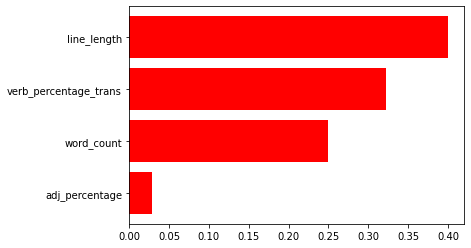

In [73]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [tr_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [74]:
joblib.dump(cv.best_estimator_,'../models/rf_mdl_{}_features.pkl'.format(feature_set))


['../models/rf_mdl_reduced_features.pkl']

## Boosting
### Definition
Ensemble method that aggregates a number of weak (just better than random guess) models to create a strong (highly correlated and predictive) one.

Each model learns from the mistakes of the model before it. 
Slow to train, but fast to predict.
One of the most-used in machine learning
Tends to overfit.
Trees for boosting should be shallower than they are for random forest

When is it used:
1. Both categorical or continuous target variable
2. Useful on nearly any type of problem
3. Interested in significance of predictors
4. Prediction time is important

When is it not used:
1. Transparancy is important
2. Training time or compute power are important
3. Data is very noisy

### Hyperparameters
Gradient boosted trees, which is only one type of boosting

#### n_estimators 
Same as random forest

#### max_depth
Same as random forest

#### learning_rate
Actual learning rate, but remains constant, unlike multilayer perceptrons



In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate':[0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)

cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}

0.975 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}.
0.975 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}.
0.975 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}.
0.975 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}.
0.975 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}.
0.975 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}.
0.972 (+/-0.013) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}.
0.973 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}.
0.975 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}.
0.975 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}.
0.968 (+/-0.019) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}.
0.964 (+/-0.017) for {'learning_rate': 

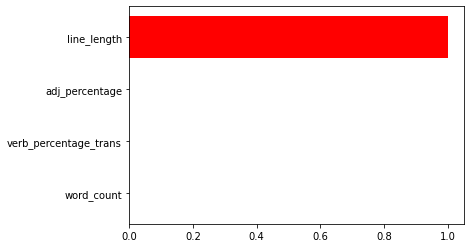

In [77]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [tr_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [78]:
joblib.dump(cv.best_estimator_,'../models/gb_mdl_{}_features.pkl'.format(feature_set))

['../models/gb_mdl_reduced_features.pkl']